# Schrodinger Eqn 1D step-potential


## The Schrodinger Equation
The dynamics of a one-dimensional quantum system are governed by the time-dependent Schrodinger equation:

$$ i\hbar\frac{\partial \psi}{\partial t} = \frac{-\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} + V \psi $$

The wave function $\psi$ is a function of both position $x$ and time $t$, and is the fundamental description of the realm of the very small. Imagine we are following the motion of a single particle in one dimension. This wave function represents a probability of measuring the particle at a position $x$ at a time $t$. Quantum mechanics tells us that (contrary to our familiar classical reasoning) this probability is not a limitation of our knowledge of the system, but a reflection of an unavoidable uncertainty about the position and time of events in the realm of the very small.

Still, this equation is a bit opaque, but to visualize the results we'll need to solve this numerically. We'll approach this using the split-step Fourier method.

## The Split-step Fourier Method
A standard way to numerically solve certain differential equations is through the use of the Fourier transform. We'll use a Fourier convention of the following form:

$$ \widetilde{\psi}(k, t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \psi(x, t) e^{-ikx} dx $$

Under this convention, the associated inverse Fourier Transform is given by:

$$ \psi(x, t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \widetilde{\psi}(k, t) e^{ikx} dk $$

Substituting this into the Schrodinger equation and simplifying gives the Fourier-space form of the Schrodinger equation:

$$ i\hbar\frac{\partial \widetilde{\psi}}{\partial t} = \frac{\hbar^2 k^2}{2m} \widetilde{\psi}

V(i\frac{\partial}{\partial k})\widetilde{\psi} $$
The two versions of the Schrodinger equation contain an interesting symmetry: the time step in each case depends on a straightforward multiplication of the wave function $\psi$, as well as a more complicated term involving derivatives with respect to $x$ or $k$. The key observation is that while the equation is difficult to evaluate fully within one of the forms, each basis offers a straightforward calculation of one of the two contributions. This suggests an efficient strategy to numerically solve the Schrodinger Equation.

First we solve the straightforward part of the $x$-space Schrodinger equation:

$$ i\hbar\frac{\partial \psi}{\partial t} = V(x) \psi $$

For a small time step $\Delta t$, this has a solution of the form

$$ \psi(x, t + \Delta t) = \psi(x, t) e^{-i V(x) \Delta t / \hbar} $$

Second, we solve the straightforward part of the $k$-space Schrodinger equation:

$$ i\hbar\frac{\partial \widetilde{\psi}}{\partial t} = \frac{\hbar^2 k^2}{2 m} \widetilde{\psi} $$

For a small time step $\Delta t$, this has a solution of the form

$$ \widetilde{\psi}(k, t + \Delta t) = \widetilde{\psi}(k, t) e^{-i \hbar k^2 \Delta t / 2m} $$

## Numerical Considerations
Solving this system numerically will require repeated computations of the Fourier transform of $\psi(x, t)$ and the inverse Fourier transform of $\widetilde{\psi}(k, t)$. The best-known algorithm for computation of numerical Fourier transforms is the Fast Fourier Transform (FFT), which is available in scipy and efficiently computes the following form of the discrete Fourier transform:

$$ \widetilde{F_m} = \sum_{n=0}^{N-1} F_n e^{-2\pi i n m / N} $$

and its inverse

$$ F_n = \frac{1}{N} \sum_{m=0}^{N-1} \widetilde{F_m} e^{2\pi i n m / N} $$

We need to know how these relate to the continuous Fourier transforms defined and used above. Let's take the example of the forward transform. Assume that the infinite integral is well-approximated by the finite integral from $a$ to $b$, so that we can write

$$ \widetilde{\psi}(k, t) = \frac{1}{\sqrt{2\pi}} \int_a^b \psi(x, t) e^{-ikx} dx $$

This approximation ends up being equivalent to assuming that the potential $V(x) \to \infty$ at $x \le a$ and $x \ge b$. We'll now approximate this integral as a Riemann sum of $N$ terms, and define $\Delta x = (b - a) / N$, and $x_n = a + n\Delta x$:

$$ \widetilde{\psi}(k, t) \simeq \frac{1}{\sqrt{2\pi}} \sum_{n=0}^{N-1} \psi(x_n, t) e^{-ikx_n} \Delta x $$

This is starting to look like the discrete Fourier transform! To bring it even closer, let's define $k_m = k_0 + m\Delta k$, with $\Delta k = 2\pi / (N\Delta x)$. Then our approximation becomes

$$ \widetilde{\psi}(k_m, t) \simeq \frac{1}{\sqrt{2\pi}} \sum_{n=0}^{N-1} \psi(x_n, t) e^{-ik_m x_n} \Delta x $$

(Note that just as we have limited the range of $x$ above, we have here limited the range of $k$ as well. This means that high-frequency components of the signal will be lost in our approximation. The Nyquist sampling theorem tells us that this is an unavoidable consequence of choosing discrete steps in space, and it can be shown that the spacing we chose above exactly satisfies the Nyquist limit if we choose $k_0 = - \pi / \Delta x$).

Plugging our expressions for $x_n$ and $k_m$ into the Fourier approximation and rearranging, we find the following:

$$ \left[\widetilde{\psi}(k_m, t) e^{i m x_0 \Delta k}\right] \simeq \sum_{n=0}^{N-1} \left[ \frac{\Delta x}{\sqrt{2\pi}} \psi(x_n, t) e^{-ik_0 x_n} \right] e^{-2\pi i m n / N} $$

Similar arguments from the inverse Fourier transform yield:

$$ \left[\frac{\Delta x}{\sqrt{2 \pi}} \psi(x_n, t) e^{-i k_0 x_n}\right] \simeq \frac{1}{N} \sum_{m=0}^{N-1} \left[\widetilde{\psi}(k_m, t) e^{-i m x_0 \Delta k} \right] e^{2\pi i m n / N} $$

Comparing these to the discrete Fourier transforms above, we find that the continuous Fourier pair

$$ \psi(x, t) \Longleftrightarrow \widetilde{\psi}(k, t) $$

corresponds to the discrete Fourier pair

$$ \frac{\Delta x}{\sqrt{2 \pi}} \psi(x_n, t) e^{-i k_0 x_n} \Longleftrightarrow \widetilde{\psi}(k_m, t) e^{-i m x_0 \Delta k} $$

subject to the approximations mentioned above. This allows a fast numerical evaluation of the Schrodinger equation.

## Putting It All Together: the Algorithm
We now put this all together using the following algorithm

Choose $a$, $b$, $N$, and $k_0$ as above, sufficient to represent the initial state of your wave function $\psi(x)$. (Warning: this is perhaps the hardest part of the entire solution. If limits in $x$ or $k$ are chosen which do not suit your problem, then the approximations used above can destroy the accuracy of the calculation!) Once these are chosen, then $\Delta x = (b - a) / N$ and $\Delta k = 2\pi / (b - a)$. Define $x_n = a + n \Delta x$ and $k_m = k_0 + m \Delta k$.

Discretize the wave-functions on this grid. Let $\psi_n(t) = \psi(x_n, t)$, $V_n = V(x_n)$, and $\widetilde{\psi}_m = \widetilde{\psi}(k_m, t)$.

To progress the system by a time-step $\Delta t$, perform the following:

Compute a half-step in $x$: $\psi_n \longleftarrow \psi_n \exp[-i (\Delta t / 2) (V_n / \hbar)]$

Calculate $\widetilde{\psi}_m$ from $\psi_n$ using the FFT.

Compute a full-step in $k$: $\widetilde{\psi}_m \longleftarrow \widetilde{\psi}_m \exp[-i \hbar (k \cdot k) \Delta t / (2 m)]$

Calculate $\psi_n$ from $\widetilde{\psi}_m$ using the inverse FFT.

Compute a second half-step in $x$: $\psi_n \longleftarrow \psi_n \exp[-i (\Delta t / 2)(V_n / \hbar)]$

Repeat step 3 until the desired time is reached.

Note that we have split the $x$-space time-step into two half-steps: this turns out to lead to a more stable numerical solution than performing the step all at once. Those familiar with numerical integration algorithms may recognize this as an example of the well-known leap-frog integration technique.

To test this out, I've written a python code which sets up a particle in a box with a potential barrier. The barrier is high enough that a classical particle would be unable to penetrate it. A quantum particle, however, can "tunnel" through, leading to a non-zero probability of finding the particle on the other side of the partition. This quantum tunneling effect lies at the core of technologies as diverse as electron microsopy, semiconding diodes, and perhaps even the future of low-powered transistors.

The animation of the result is below (for a brief introduction to the animation capabilities of python, see this post). The top panel shows the position-space wave function, while the bottom panel shows the momentum-space wave function.

{% video /downloads/videos/schrodinger_barrier.mp4 360 270 /downloads/videos/schrodinger_barrier_frame.png %}

Notice that the height of the potential barrier (denoted by the dashed line in the bottom panel) is far larger than the energy of the particle. Still, due to quantum effects, a small part of the wave function is able to tunnel through the barrier and reach the other side.

The python code used to generate this animation is included below. It's pretty long, but I've tried to comment extensively to make the algorithm more clear. If you're so inclined, you might try running the example and adjusting the potential or the input wave function to see the effect on the dynamics of the quantum system.



In [1]:
import numpy as np
from scipy import integrate
from scipy import sparse
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')    #suppress warnings
plt.rc('savefig', dpi=150)
plt.rcParams['animation.embed_limit'] = 2**3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Set initial conditions

In [2]:
dx = 0.002                  # spatial separation
x = np.arange(0, 8, dx)    # spatial grid points
kx = 50                     # wave number
m = 1                       # mass
sigma = 0.5                 # width of initial gaussian wave-packet
x0 = 2.                     # center of initial gaussian wave-packet

### Initial Wavefunction

In [3]:
A = 1.0 / (sigma * np.sqrt(np.pi))  # normalization constant
psi0 = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)

### Potential V(x)

In [4]:
V_hight = 1000

V = np.zeros(x.shape)
for i, _x in enumerate(x):
    if _x > 4:
        V[i] = V_hight

### Make a plot of $\Large \psi_o$ and V

Total Probability:  0.999999992417676


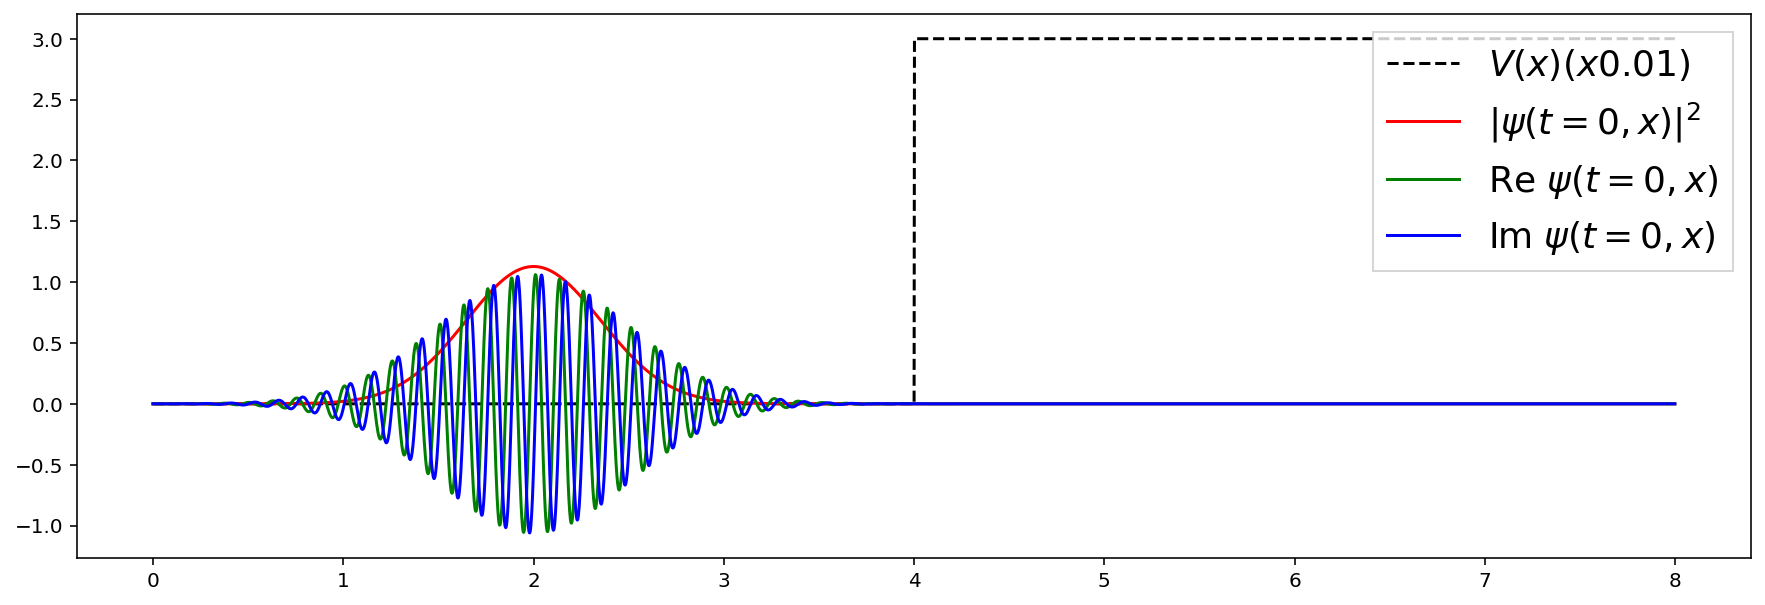

In [5]:
fig = plt.figure(figsize=(15,5))
plt.plot(x, V*0.003, "k--", label=r"$V(x) (x0.01)$")
plt.plot(x, np.abs(psi0)**2, "r", label=r"$\vert\psi(t=0,x)\vert^2$")
plt.plot(x, np.real(psi0), "g", label=r"Re $\psi(t=0,x)$")
plt.plot(x, np.imag(psi0), "b", label=r"Im $\psi(t=0,x)$")
plt.legend(loc=1, fontsize=18, fancybox=False)
#fig.savefig('step_initial@2x.png')
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

### Laplace Operator (Finite Difference)

In [6]:
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

### Solve Schrodinger Equation

Solving initial value problem


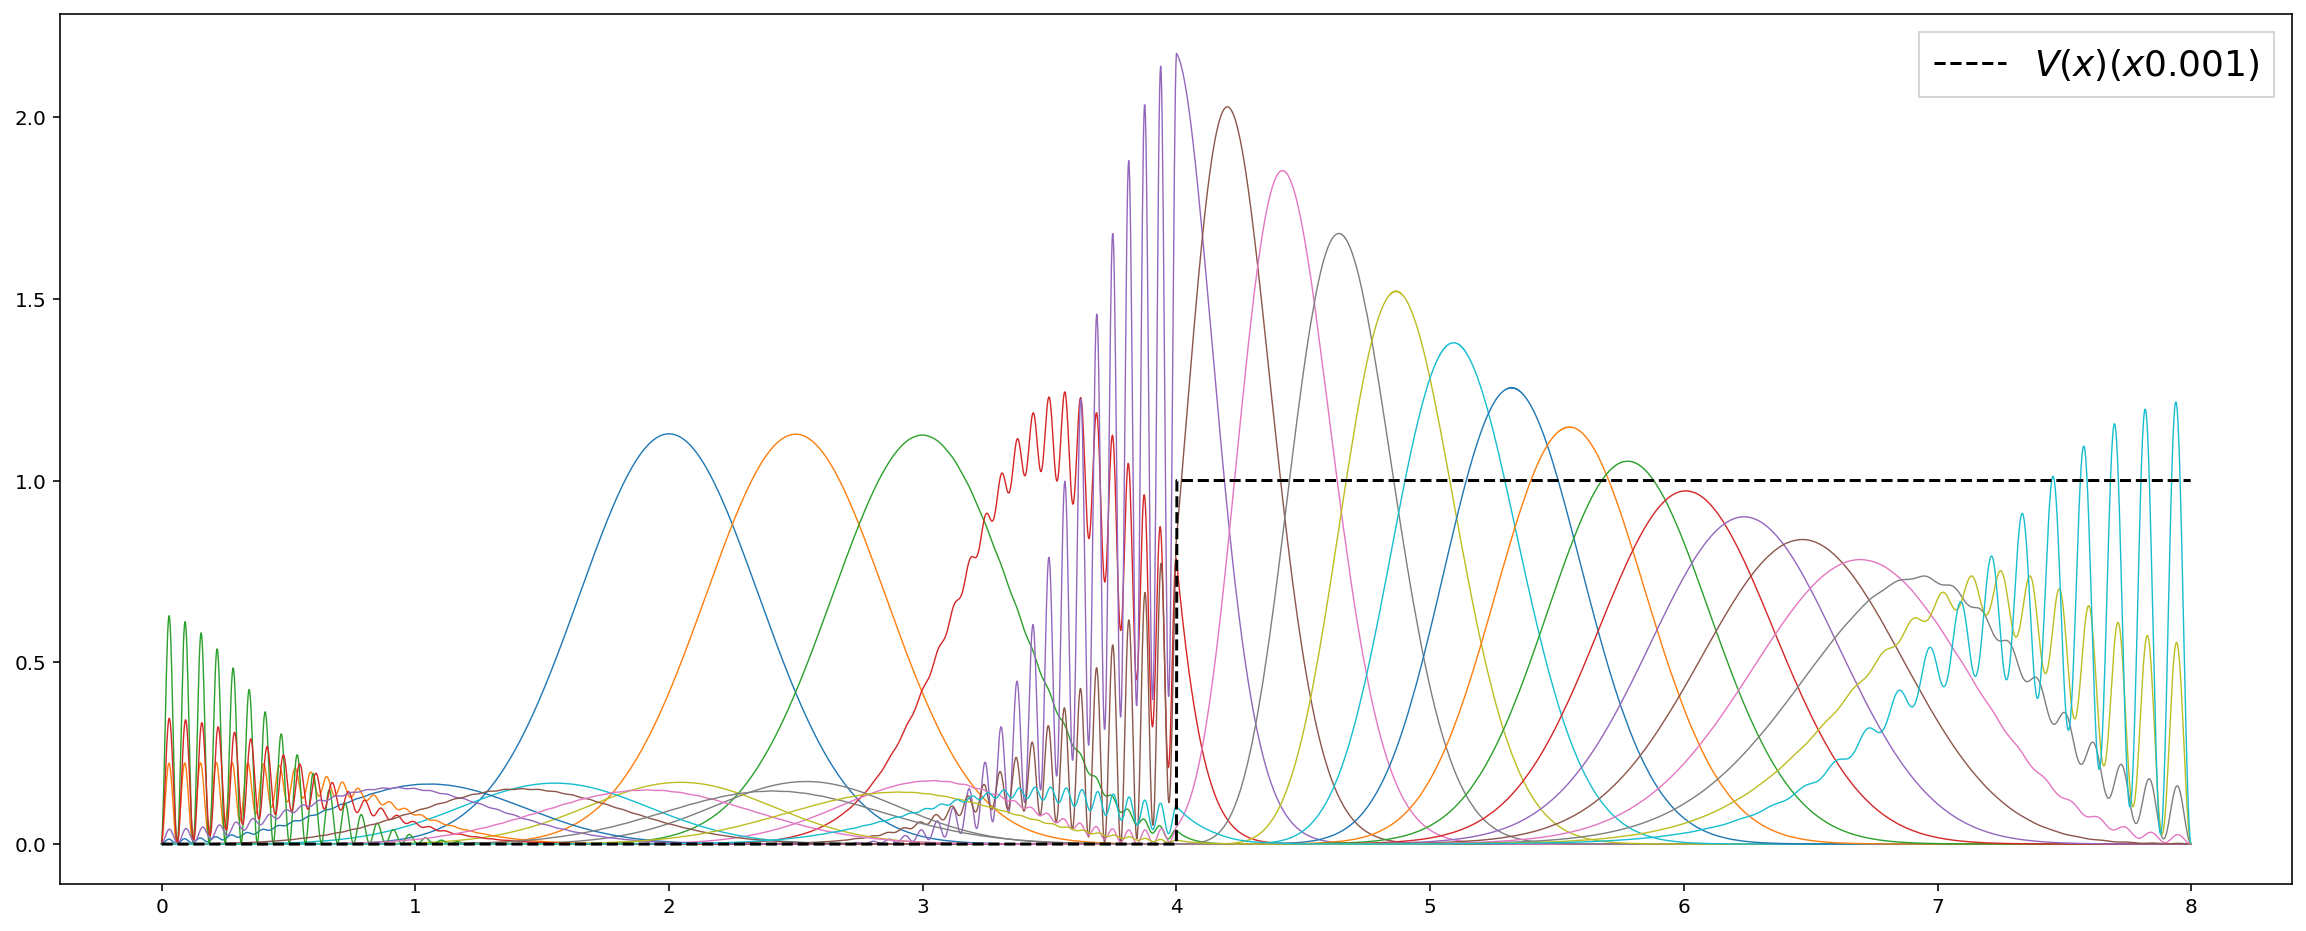

In [8]:
hbar = 1        # hbar = 1.0545718176461565e-34 RHS of Schrodinger Equation

def psi_t(t, psi):            # Solve the Initial Value Problem
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)


dt = 0.01  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.2    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

print("Solving initial value problem")
sol = integrate.solve_ivp(psi_t,t_span = [t0, tf],y0 = psi0,t_eval = t_eval,method = "RK23")
fig = plt.figure(figsize=(20, 8))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:, i])**2,linewidth=0.7)                  # Plot Wavefunctions
#    print("Total Prob. in frame", i, "=", np.sum(np.abs(sol.y[:, i])**2)*dx)   # Print Total Probability (Should = 1)
plt.plot(x, V * 0.001, "k--", label=r"$V(x) (x0.001)$")   # Plot Potential
plt.legend(loc=1, fontsize=18, fancybox=False)
plt.show()

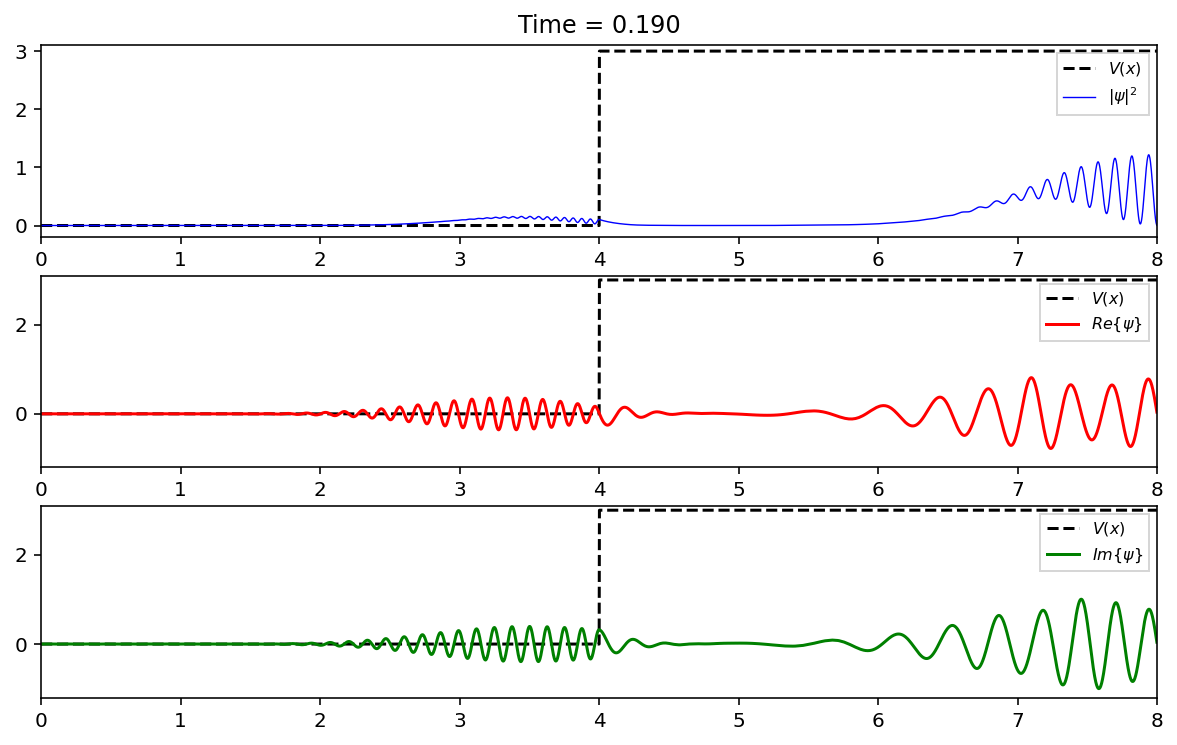

In [9]:
# Animation
fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot(3, 1, 1)
ax1.set_xlim(0, 8)
ax1.set_ylim(-0.2, 3.1)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ ")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$",linewidth=0.7)
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(3, 1, 2)
ax2.set_xlim(0, 8)
ax2.set_ylim(-1.2, 3.1)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$")
line22, = ax2.plot([], [], "r", label=r"$Re\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax3 = plt.subplot(3, 1, 3)
ax3.set_xlim(0, 8)
ax3.set_ylim(-1.2, 3.1)
line31, = ax3.plot([], [], "k--", label=r"$V(x)$")
line32, = ax3.plot([], [], "g", label=r"$Im\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)

def init():
    line11.set_data(x, V * 0.003)
    line21.set_data(x, V * 0.003)
    line31.set_data(x, V * 0.003)
    return line11, line21,line31

def animate(i):
    line12.set_data(x, np.abs(sol.y[:, i])**2)
    line22.set_data(x, np.real(sol.y[:, i]))
    line32.set_data(x, np.imag(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line22,line32

anim1 = animation.FuncAnimation(fig, animate, init_func=init,frames=len(sol.t), interval=100, blit=True)


# Save the animation into a short video
#anim1.save('sho1.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)
anim1.save('step@2xL.gif', writer='pillow', fps=15)

# Display the animation in the jupyter notebook
HTML(anim1.to_jshtml())

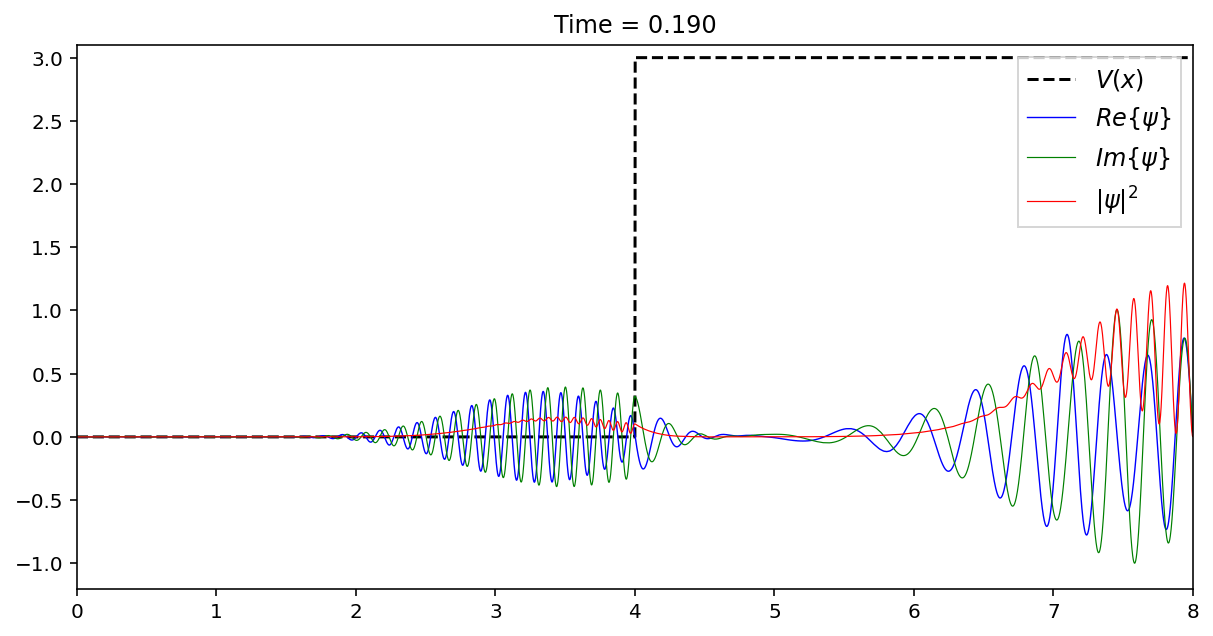

In [10]:
# Animation
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot()
ax1.set_xlim(0, 8)
ax1.set_ylim(-1.2, 3.1)
title = ax1.set_title('')
line11, = ax1.plot( [], "k--", label=r"$V(x)$")
line12, = ax1.plot( [], "b", label=r"$Re\{ \psi \}$",linewidth=0.7)
line13, = ax1.plot( [], "g", label=r"$Im\{ \psi \}$",linewidth=0.6)
line14, = ax1.plot( [], "r", label=r"$\vert \psi \vert^2$",linewidth=0.6)

plt.legend(loc=1, fontsize=12, fancybox=False)


def init():
    line11.set_data(x, V * 0.003)
    return line11,line11,line11

def animate(i):
    line12.set_data(x, np.real(sol.y[:, i]))
    line13.set_data(x, np.imag(sol.y[:, i]))
    line14.set_data(x, np.abs(sol.y[:, i])**2)
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line13,line14

anim1 = animation.FuncAnimation(fig, animate, init_func=init,frames=len(sol.t), interval=100, blit=True)


# Save the animation into a short video
#anim1.save('sho1.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)
anim1.save('step@2comxL.gif', writer='pillow', fps=15)

# Display the animation in the jupyter notebook
HTML(anim1.to_jshtml())